Topic: Challenge Set **6** <br> Subject: Linear Regression and Learning Curve <br> Date: 10/09/2017 <br> Name: Kenny Leung <br> Worked with: -- <br>Location: sf17_ds8/student_submissions/challenges/06-linear_learning/leung_kenny/challenge_set_6_kenny.ipynb

In [826]:
import sys
print("Python Version:", sys.version)

Python Version: 3.6.1 |Anaconda custom (x86_64)| (default, May 11 2017, 13:04:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


In [827]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import seaborn as sns
import matplotlib.style as style
import random

%matplotlib inline

In [828]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Challenge 1

In [849]:
B_0 = random.uniform(0, 1)
B_1 = random.uniform(0, 1)

epsilon = np.random.uniform(low=0, high=1, size=(1000,))
x = np.logspace(0, 3, num = 1000,)
y = B_0 + B_1*np.log(x) + epsilon

df = pd.DataFrame({'X': x,'y': y})

df['log'] = np.log(df['X'])
df['quad'] = df['X'] ** 2
df.head()

,X,y,log,quad
0,1.000000,0.889251,0.000000,1.000000
1,1.006939,0.345064,0.006915,1.013925
2,1.013925,0.214521,0.013829,1.028045
3,1.020961,0.567643,0.020744,1.042361
4,1.028045,0.334176,0.027659,1.056876


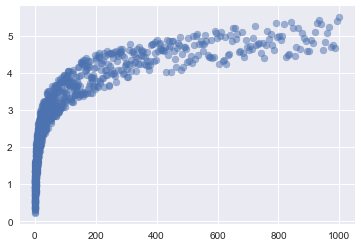

In [850]:
plt.scatter(df['X'],df['y'],alpha=0.5)

In [851]:
X_train, X_test, y_train, y_test = train_test_split(df['quad'], y, test_size=0.2,random_state=42)
lr_model1 = LinearRegression()
lr_model1.fit(X_train.values.reshape(-1, 1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [852]:
lr_test_pred1 = lr_model1.predict(X_test.values.reshape(-1, 1))

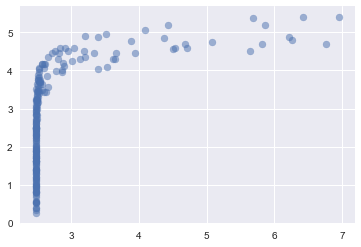

In [853]:
plt.scatter(lr_test_pred1,y_test,alpha=0.5,)

In [854]:
X_train, X_test, y_train, y_test = train_test_split(df['log'], y, test_size=0.2,random_state=42)
lr_model2 = LinearRegression()
lr_model2.fit(X_train.values.reshape(-1, 1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [855]:
lr_test_pred2 = lr_model2.predict(X_test.values.reshape(-1, 1))

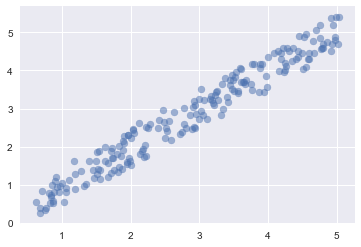

In [856]:
plt.scatter(lr_test_pred2,y_test,alpha=0.5,)

# Challenge 2

In [861]:
B_0 = random.uniform(0, 1)
B_1 = random.uniform(0, 1)
B_2 = random.uniform(0, 1)

epsilon = np.random.uniform(low=0, high=1, size=(200,))
x = np.linspace(0, 5, num = 200,)

y = B_0 + B_1*x + B_2*x**2 + epsilon

df = pd.DataFrame({'X': x,'y': y})
df.head()

,X,y
0,0.000000,1.515757
1,0.025126,0.823696
2,0.050251,1.181587
3,0.075377,1.593956
4,0.100503,1.363552


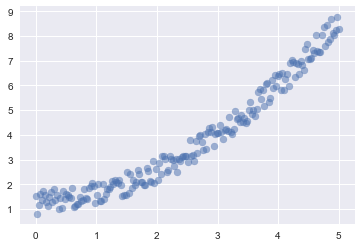

In [862]:
plt.scatter(df['X'],df['y'],alpha=0.5)

In [863]:
X_train, X_test, y_train, y_test = train_test_split(df['X'], y, test_size=0.2,random_state=42)

In [864]:
lr_model3 = LinearRegression()
lr_model3.fit(X_train.values.reshape(-1, 1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [865]:
lr_test_pred3 = lr_model3.predict(X_train.values.reshape(-1, 1))

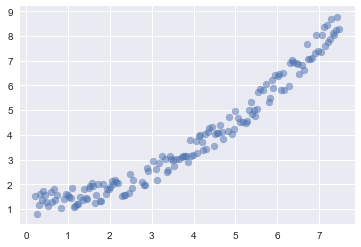

In [866]:
plt.scatter(lr_test_pred3,y_train,alpha=0.5,)

In [867]:
print('LinReg Train MSE: ', mean_squared_error(y_train,lr_test_pred3))
print('LinReg r2: ',r2_score(y_train, lr_test_pred3))

LinReg Train MSE:  0.365568488505
LinReg r2:  0.926998862508


In [868]:
lr_test_pred4 = lr_model3.predict(X_test.values.reshape(-1, 1))

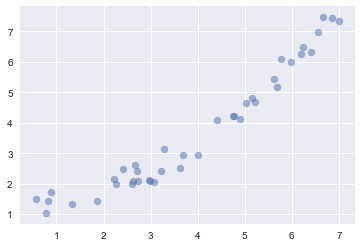

In [869]:
plt.scatter(lr_test_pred4,y_test,alpha=0.5,)

In [870]:
print('LinReg Test MSE: ', mean_squared_error(y_test,lr_test_pred4))
print('LinReg r2: ',r2_score(y_test, lr_test_pred4))

LinReg Test MSE:  0.330700518629
LinReg r2:  0.91486976064


# Challenge 3

In [871]:
B_0 = random.uniform(0, 1)
B_1 = random.uniform(0, 1)
B_2 = random.uniform(0, 1)

epsilon = np.random.uniform(low=0, high=5, size=(1000,))
x = np.random.uniform(low=0, high=5, size=(1000,))

y = B_0 + B_1*x + B_2*x**2 + epsilon

df = pd.DataFrame({'X': x,'y': y})

for num in range(0,8):
    df[num] = df['X'] ** num

In [872]:
df.head()

,X,y,0,1,2,3,4,5,6,7
0,0.096719,3.676691,1.0,0.096719,0.009355,0.000905,0.000088,0.000008,8.186131e-07,7.917568e-08
1,1.710246,8.300837,1.0,1.710246,2.924942,5.002372,8.555287,14.631648,2.502372e+01,4.279672e+01
2,1.975383,9.358783,1.0,1.975383,3.902137,7.708215,15.226676,30.078515,5.941658e+01,1.173705e+02
3,4.035934,17.483187,1.0,4.035934,16.288764,65.740377,265.323829,1070.829482,4.321797e+03,1.744249e+04
4,4.727672,24.385907,1.0,4.727672,22.350881,105.667632,499.561891,2361.764691,1.116565e+04,5.278752e+04


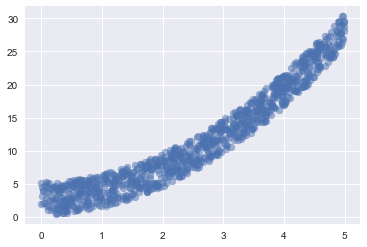

In [873]:
plt.scatter(df[1],df['y'],alpha=0.5)

LinReg x^0 Train MSE:  5.32812923741
LinReg x^0 Test MSE:  5.4576420498
LinReg x^0 r2:  0.905073961114
LinReg x^0 AIC:  -1.39403367493


LinReg x^1 Train MSE:  2.88901702054e-29
LinReg x^1 Test MSE:  2.68713757709e-29
LinReg x^1 r2:  1.0
LinReg x^1 AIC:  135.572982335


LinReg x^2 Train MSE:  3.37974512593e-30
LinReg x^2 Test MSE:  3.07563308399e-30
LinReg x^2 r2:  1.0
LinReg x^2 AIC:  141.908084058


LinReg x^3 Train MSE:  6.54337009721e-30
LinReg x^3 Test MSE:  6.04809795272e-30
LinReg x^3 r2:  1.0
LinReg x^3 AIC:  142.55561791


LinReg x^4 Train MSE:  2.93909273984e-29
LinReg x^4 Test MSE:  2.78074085388e-29
LinReg x^4 r2:  1.0
LinReg x^4 AIC:  141.504500621


LinReg x^5 Train MSE:  2.43284895763e-29
LinReg x^5 Test MSE:  2.2485802176e-29
LinReg x^5 r2:  1.0
LinReg x^5 AIC:  143.929337388


LinReg x^6 Train MSE:  3.496349707e-28
LinReg x^6 Test MSE:  3.34471846914e-28
LinReg x^6 r2:  1.0
LinReg x^6 AIC:  140.530000157


LinReg x^7 Train MSE:  5.00885870561e-26
LinReg x^7 Test MSE:  

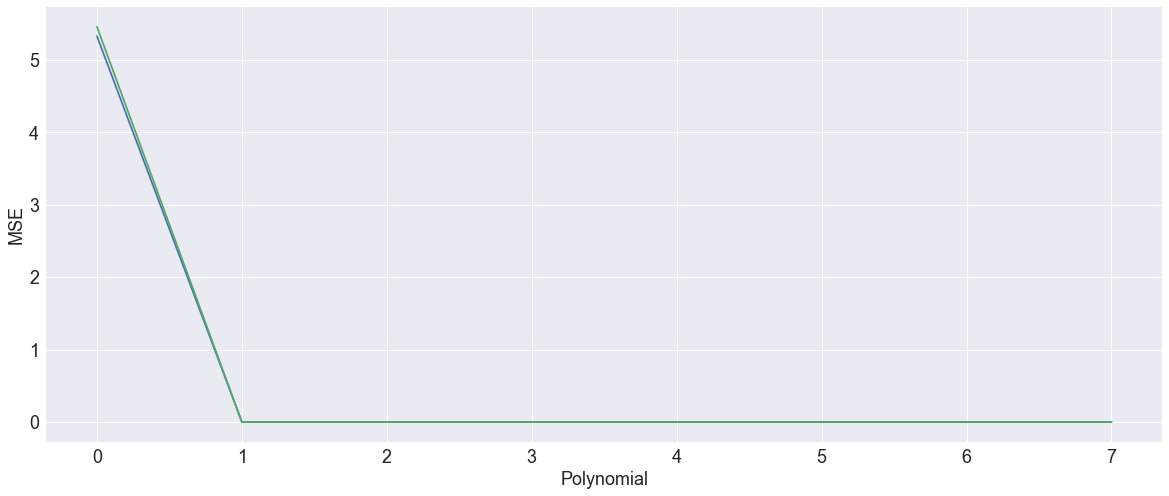

In [874]:
plt.figure(figsize=(20,8))
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)

plt.xlabel('Polynomial',fontsize=18)
plt.ylabel('MSE',fontsize=18)

test_errors=[]
train_errors=[]
r2s = []
aics = []

for num in range(0,8):
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:num+1], y, test_size=0.2,random_state=42)
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    model_train_pred = model.predict(X_train)
    model_test_pred = model.predict(X_test)
    
    test_error = mean_squared_error(y_test,model_test_pred)
    test_errors.append(test_error)
    
    train_error = mean_squared_error(y_train,model_train_pred)
    train_errors.append(train_error)
    
    r2 = r2_score(y_test, model_test_pred)
    r2s.append(r2)
    
    aic = 2*(num+1) - 2*np.log(mean_squared_error(y_test,model_test_pred))
    aics.append(aic)
    
    print('LinReg x^'+str(num)+ ' Train MSE: ', mean_squared_error(y_train,model_train_pred))
    print('LinReg x^'+str(num)+ ' Test MSE: ', mean_squared_error(y_test,model_test_pred))
    print('LinReg x^'+str(num)+ ' r2: ',r2_score(y_test, model_test_pred))
    print('LinReg x^'+str(num)+ ' AIC: ',2*(num+1) - 2*np.log(mean_squared_error(y_test,model_test_pred)))
    print('\n')
    
plt.plot(range(0,8),train_errors)
plt.plot(range(0,8),test_errors)

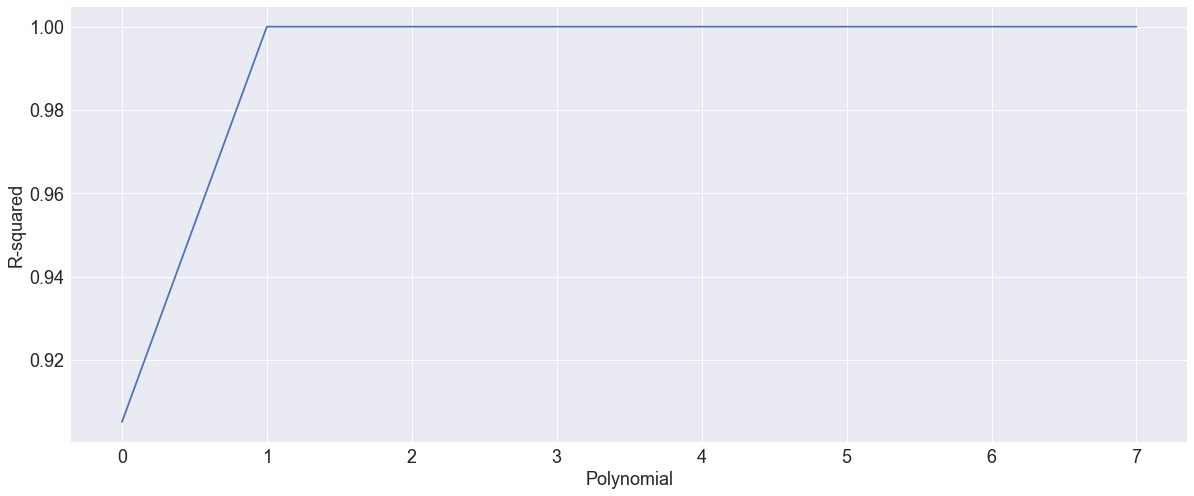

In [875]:
plt.figure(figsize=(20,8))
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)

plt.xlabel('Polynomial',fontsize=18)
plt.ylabel('R-squared',fontsize=18)

plt.plot(range(0,8),r2s)

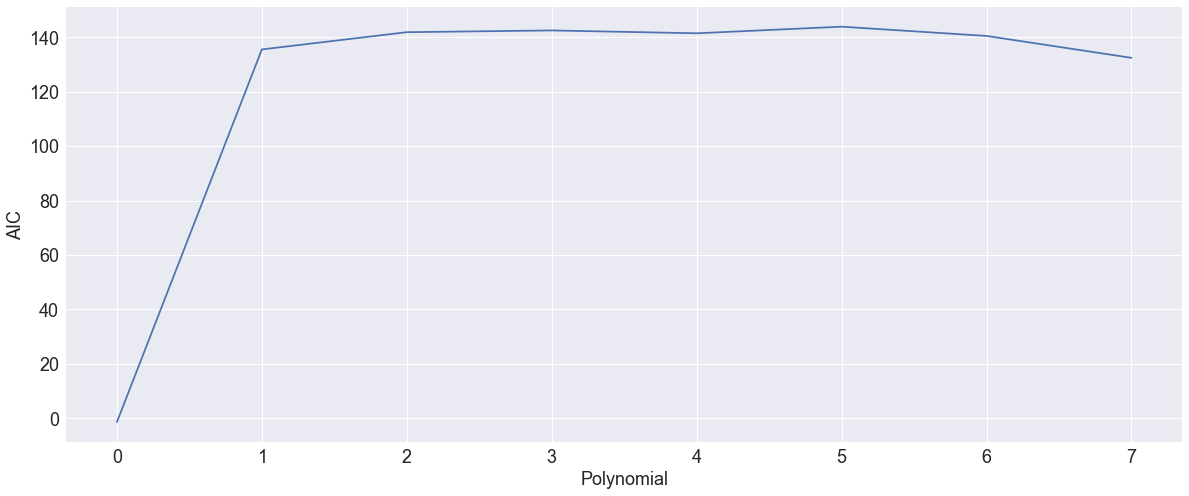

In [876]:
plt.figure(figsize=(20,8))
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)

plt.xlabel('Polynomial',fontsize=18)
plt.ylabel('AIC',fontsize=18)

plt.plot(range(0,8),aics)

# Challenge 4

In [877]:
B_0 = random.uniform(0, 1)
B_1 = random.uniform(0, 1)
B_2 = random.uniform(0, 1)

epsilon = np.random.uniform(low=0, high=0.5, size=(200,))
x = np.random.uniform(low=0, high=100, size=(200,))

y = B_0 + B_1*x + B_2*x**2 + epsilon

df = pd.DataFrame({'X': x,'y': y})
df.head()

,X,y
0,83.604377,6562.110542
1,29.189842,817.956820
2,16.709817,275.443194
3,96.510037,8730.982592
4,47.597698,2145.910936


m = 5 Train MSE:  348633.25583
m = 5 Test MSE:  49048.7805264


m = 10 Train MSE:  651083.76726
m = 10 Test MSE:  488313.598971


m = 15 Train MSE:  605265.131768
m = 15 Test MSE:  670204.821285


m = 20 Train MSE:  685766.4412
m = 20 Test MSE:  126922.445925


m = 25 Train MSE:  580318.199234
m = 25 Test MSE:  454043.464114


m = 30 Train MSE:  664575.758107
m = 30 Test MSE:  281155.60108


m = 35 Train MSE:  471424.389484
m = 35 Test MSE:  950556.293043


m = 40 Train MSE:  475853.830421
m = 40 Test MSE:  734647.982063


m = 45 Train MSE:  484759.34133
m = 45 Test MSE:  593120.00457


m = 50 Train MSE:  416994.381474
m = 50 Test MSE:  752964.337839


m = 55 Train MSE:  447564.914
m = 55 Test MSE:  674644.268276


m = 60 Train MSE:  540410.347948
m = 60 Test MSE:  274539.439013


m = 65 Train MSE:  527201.346689
m = 65 Test MSE:  455686.693081


m = 70 Train MSE:  547462.261793
m = 70 Test MSE:  336018.035402


m = 75 Train MSE:  524740.444006
m = 75 Test MSE:  482811.547719


m = 80 

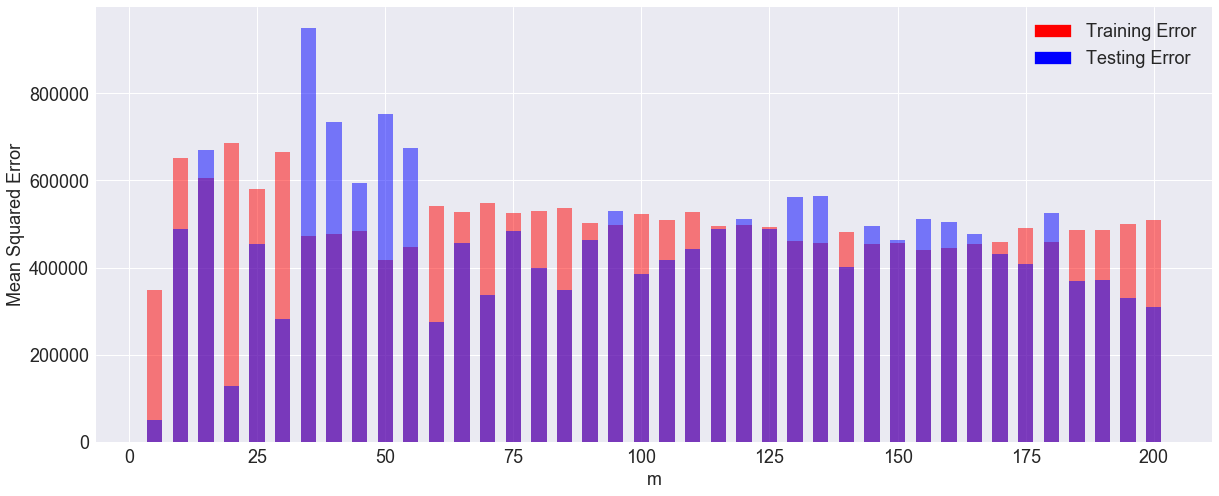

In [878]:
plt.figure(figsize=(20,8))
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
red_patch = mpatches.Patch(color='red', label='Training Error')
blue_patch = mpatches.Patch(color='blue', label='Testing Error')

plt.legend(handles=[red_patch,blue_patch],prop={'size': 18})
plt.xlabel('m',fontsize=18)
plt.ylabel('Mean Squared Error',fontsize=18)

for num in range(5,len(df)+5,5):
    X_train, X_test, y_train, y_test = train_test_split(df[0:num]['X'], df[0:num]['y'], test_size=0.2,random_state=42)
    model = LinearRegression()
    model.fit(X_train.values.reshape(-1, 1),y_train)
    
    model_train_pred = model.predict(X_train.values.reshape(-1, 1))
    model_test_pred = model.predict(X_test.values.reshape(-1, 1))
    
    plt.bar(num,mean_squared_error(y_train,model_train_pred),alpha=0.5,width=3,color='red')
    plt.bar(num,mean_squared_error(y_test,model_test_pred),alpha=0.5,width=3,color='blue')

    print('m = '+str(num)+ ' Train MSE: ', mean_squared_error(y_train,model_train_pred))
    print('m = '+str(num)+ ' Test MSE: ', mean_squared_error(y_test,model_test_pred))
    print('\n')